In [2]:
# import packages
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix

In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

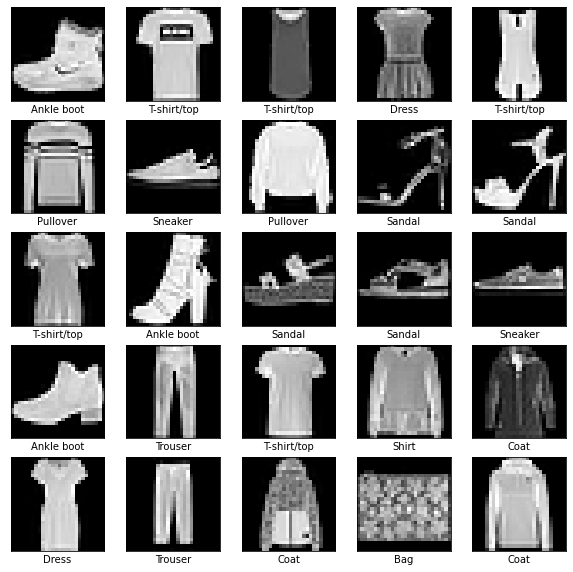

In [5]:
# figure view
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train_full[i], cmap="gray")
    plt.xlabel(class_names[y_train_full[i]])
plt.show()

In [4]:
# construct validation set
X_valid = X_train_full[:5000] / 255.0
X_train = X_train_full[5000:] / 255.0
X_test = X_test / 255.0

y_valid = y_train_full[:5000]
y_train = y_train_full[5000:]

In [7]:
len(X_valid)

5000

In [21]:
len(X_train)

55000

In [78]:
# build model using relu
# two layor(200, 100): 85.5 / one layor (512):86 
# /optimizer: sgd, 88% tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.8, nesterov=False), default
# / learning rate adam(0.0001:88)
from functools import partial

my_dense_layer = partial(tf.keras.layers.Dense, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.0001))

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    my_dense_layer(516),
    my_dense_layer(10, activation="softmax")
])

In [79]:
# compile model

model.compile(loss="sparse_categorical_crossentropy",
             optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
             metrics=["accuracy"])

In [80]:
# accuracy
history = model.fit(X_train, y_train, epochs=15, validation_data=(X_valid,y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/15
55000/55000 [==============================] - 9s 157us/sample - loss: 0.6052 - accuracy: 0.8160 - val_loss: 0.5032 - val_accuracy: 0.8544
Epoch 2/15
55000/55000 [==============================] - 8s 145us/sample - loss: 0.4714 - accuracy: 0.8577 - val_loss: 0.4707 - val_accuracy: 0.8586
Epoch 3/15
55000/55000 [==============================] - 8s 146us/sample - loss: 0.4301 - accuracy: 0.8707 - val_loss: 0.4269 - val_accuracy: 0.8680
Epoch 4/15
55000/55000 [==============================] - 8s 147us/sample - loss: 0.4046 - accuracy: 0.8761 - val_loss: 0.3907 - val_accuracy: 0.8848
Epoch 5/15
55000/55000 [==============================] - 8s 145us/sample - loss: 0.3830 - accuracy: 0.8846 - val_loss: 0.3870 - val_accuracy: 0.8856
Epoch 6/15
55000/55000 [==============================] - 8s 148us/sample - loss: 0.3687 - accuracy: 0.8883 - val_loss: 0.3954 - val_accuracy: 0.8750
Epoch 7/15
55000/55000 [===========================

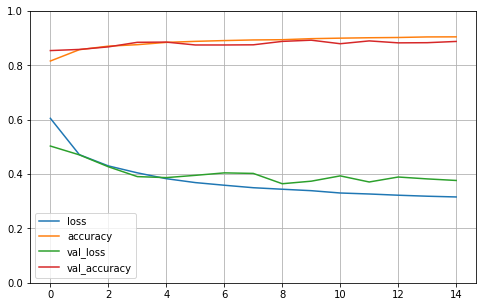

In [81]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [82]:
model.evaluate(X_test,y_test)


10000/10000 [==============================] - 1s 61us/sample - loss: 0.4070 - accuracy: 0.8780


[0.4070372863292694, 0.878]

In [83]:
y_pred = model.predict_classes(X_train)
conf_train = confusion_matrix(y_train, y_pred)
print(conf_train)

[[4621    2   96  225    6    0  576    0   17    0]
 [   3 5363    3   68    3    0    3    0    1    0]
 [  20    7 4726   53  438    0  245    0    7    0]
 [  38   17   42 5286   66    0   48    0    2    0]
 [   2    4  353  244 4614    0  286    0    9    0]
 [   0    0    0    0    0 5123    0  306    4   74]
 [ 431    5  348  192  263    0 4243    0   25    0]
 [   0    0    0    0    0    3    0 5430    0   55]
 [   9    1   11   17   15    8   14   10 5424    1]
 [   0    0    0    0    0    1    0  221    1 5271]]


[[4496    1  115   72   23    1  743    0   92    0]
 [   1 5342    5   70   12    0    8    0    6    0]
 [  20    0 4543   15  612    0  275    0   31    0]
 [  71    3   76 4880  307    0  137    0   25    0]
 [   2    2  253   49 4987    0  199    0   20    0]
 [   0    0    1    0    0 5428    0   42    9   27]
 [ 329    4  358   48  359    0 4347    0   62    0]
 [   0    0    0    0    0   43    0 5231   10  204]
 [   1    0    6    1   20    1    8    5 5468    0]
 [   0    0    1    0    0   13    0  103    4 5373]]
 
 10000/10000 [==============================] - 1s 51us/sample - loss: 0.4061 - accuracy: 0.8779
[0.4060910409927368, 0.8779]



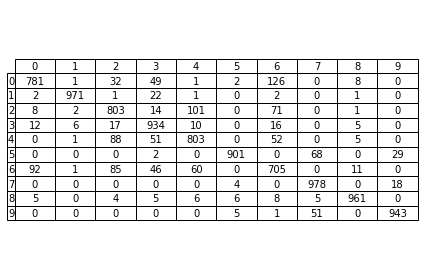

In [84]:
y_pred = model.predict_classes(X_test)
conf_test = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots()

# hide axes
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

# create table and save to file
df = pd.DataFrame(conf_test)
ax.table(cellText=df.values, rowLabels=np.arange(10), colLabels=np.arange(10), loc='center', cellLoc='center')
fig.tight_layout()
plt.savefig('conf_mat.pdf')